In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.externals import joblib

%matplotlib inline
np.random.seed(42)

In [14]:
# Load data
train_df = pd.read_csv("~/real_estate/data/train_df_smote.csv")
test_df = pd.read_csv("~/real_estate/data/supervised_dfs/test_df_pca.csv")

# Split daga
features = train_df.columns[:-1]

X_train = train_df[features].values
X_test = test_df[features].values
y_train = train_df["target"].values
y_test = test_df["target"].values

In [ ]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

In [5]:
y_train_hat = pd.DataFrame(svr.predict(X_train), columns=["target"])
y_test_hat = pd.DataFrame(svr.predict(X_test), columns=["target"])

In [6]:
errors_train = abs(y_train.values - y_train_hat["target"].values)
errors_test = abs(y_test.values - y_test_hat["target"].values)

In [7]:
print("Mean test error: ", np.mean(errors_test))
print("Mean test value: ", np.mean(y_test.values))
print("R^2 test: ", np.square(np.corrcoef(y_test_hat["target"].values, y_test.values)[0,1]))
print('---')
print("Mean train error: ", np.mean(errors_train))
print("Mean train value: ", np.mean(y_train.values))
print("R^2 train: ", np.square(np.corrcoef(y_train_hat["target"].values, y_train.values)[0,1]))

Mean test error:  0.027989716334949254
Mean test value:  0.011548391038586212
R^2 test:  0.05172932991984018
---
Mean train error:  0.03297205323557694
Mean train value:  0.04235101284879032
R^2 train:  0.1762295165044113


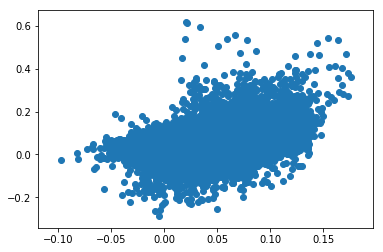

In [8]:
plt.scatter(y_train_hat["target"].values, y_train.values)
plt.show()

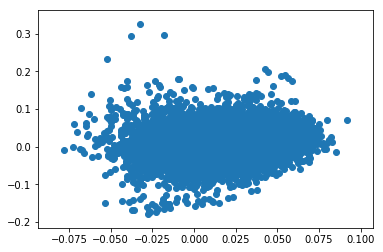

In [9]:
plt.scatter(y_test_hat["target"].values, y_test.values)
plt.show()